### Discussion Related to Outliers and Impact on Machine Learning Algorithms

1. Machine learning models that are sensitive to Outliers
- Linear Regression
- Logistic Regression
- Kmeans clustering
- Hierarichal 
- PCA
- Nueral Networks


2. Machine Learning models that are not sensitive
- Naivye Bayes Classifier
- SVM
- Decision tree classifier or regressor
- Ensemble(RF,XGboost,GB)
- KNN

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

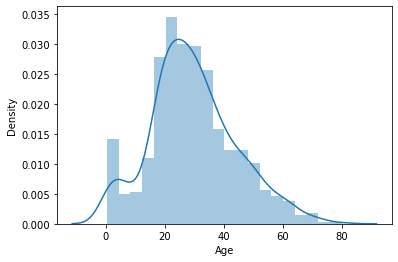

In [5]:
sns.distplot(df['Age'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

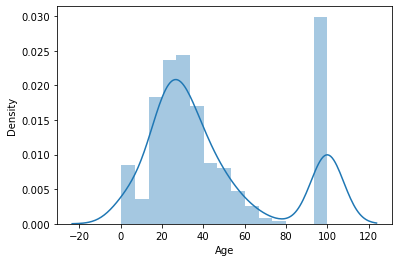

In [6]:
sns.distplot(df['Age'].fillna(100))

### Gaussian Distribution

Text(0, 0.5, 'No of passengers')

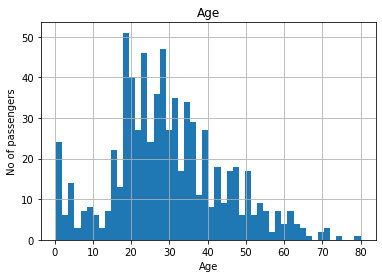

In [7]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

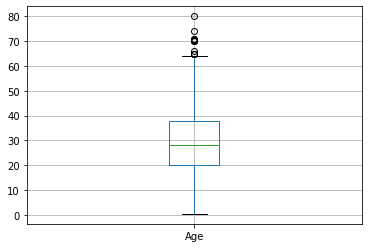

In [8]:
figure=df.boxplot(column='Age')

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If Feature follows a Gaussian Distribution we will calculate the boundaries which will differentiate the outlier

In [11]:
upper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std() 
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

### If Feature is skewed we use the below technique

Text(0, 0.5, 'No of passengers')

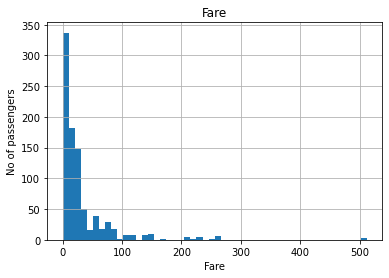

In [16]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

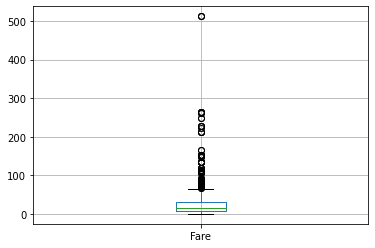

In [17]:
figure=df.boxplot(column='Fare')

In [18]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
### lets compute the inter quantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [20]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [21]:
### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [22]:
 data=df.copy()

In [23]:
data.loc[data['Age']>=73,'Age']=73

In [24]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passengers')

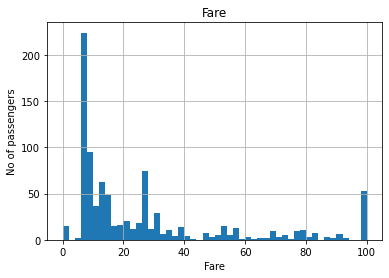

In [25]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

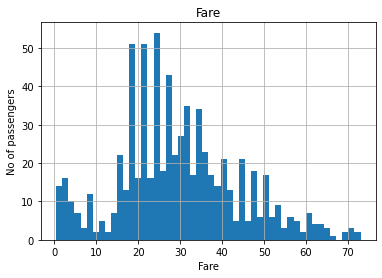

In [26]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [29]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classif=LogisticRegression()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
y_pred1=classif.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print(f'Accuracy_score: {accuracy_score(y_test,y_pred)} ')
print(f'roc_auc_ score: {roc_auc_score(y_test,y_pred1[:,1])} ')

Accuracy_score: 0.6791044776119403 
roc_auc_ score: 0.7148574138851012 


In [30]:
### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classif=RandomForestClassifier()
classif.fit(X_train,y_train)
y_pred=classif.predict(X_test)
y_pred1=classif.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print(f'Accuracy_score: {accuracy_score(y_test,y_pred)} ')
print(f'roc_auc_ score: {roc_auc_score(y_test,y_pred1[:,1])} ')

Accuracy_score: 0.6604477611940298 
roc_auc_ score: 0.726892749155155 
